# 6.4 Machine Learning Part 1¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Defining a path
path = r'/Users/hectorvargas/Desktop/Career_Foundry/12-2022 Gun Violence Analysis'

In [50]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'gun_violence_script2wonan.csv'))

## 2. Data cleaning

In [51]:
df.columns

Index(['Unnamed: 0', 'state', 'n_killed', 'Childs', 'Teens', 'Adults', 'Male',
       'Female', 'date', 'year', 'month', 'day'],
      dtype='object')

In [8]:
df.head()

,Unnamed: 0,state,n_killed,Childs,Teens,Adults,Male,Female,date,year,month,day
0,0,Pennsylvania,0,0.0,0.0,5.0,3.0,1.0,2013-01-01,2013,January,1
1,1,California,1,0.0,0.0,4.0,1.0,0.0,2013-01-01,2013,January,1
2,2,Ohio,1,0.0,0.0,5.0,5.0,0.0,2013-01-01,2013,January,1
3,3,Colorado,4,0.0,0.0,4.0,3.0,1.0,2013-01-05,2013,January,5
4,4,North Carolina,2,0.0,1.0,3.0,2.0,2.0,2013-01-07,2013,January,7


In [52]:
df2=df.dropna()

In [55]:
df2.shape

(192716, 12)

In [56]:
df2.isnull().values.any()

False

/Users/hectorvargas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Male', ylabel='Density'>

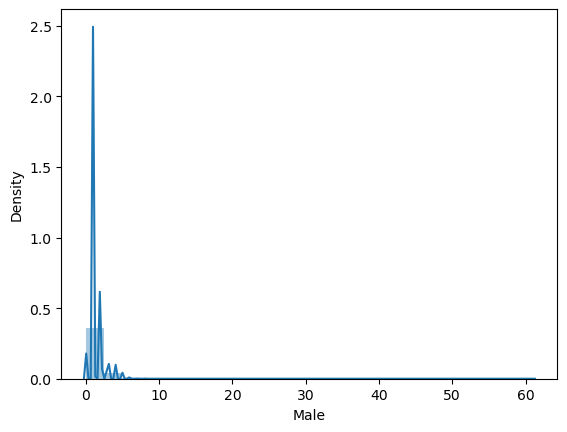

In [90]:
sns.distplot(df2['Male'], bins=25)

In [87]:
# Check the mean
df2['Male'].mean() 

1.524071690985699

In [88]:
# Check the median
df2['Male'].median()

1.0

In [89]:
# Check the max
df2['Male'].max()

61.0

### 3. Data prep for regression analysis 

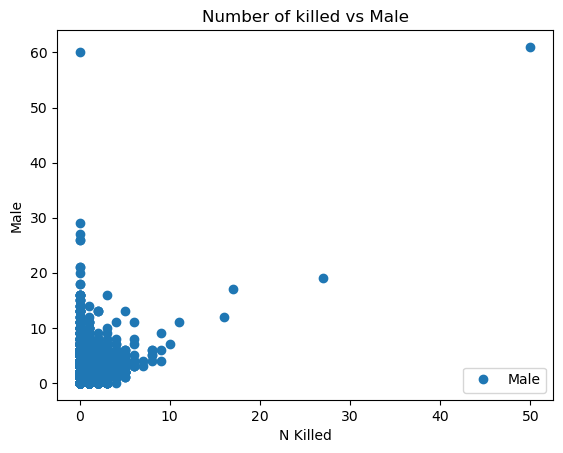

In [91]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'n_killed', y='Male',style='o')
plt.title('Number of killed vs Male')  
plt.xlabel('N Killed')  
plt.ylabel('Male')  
plt.show()

In [67]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df2['n_killed'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)

In [68]:
X

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]])

In [69]:
y

array([[3.],
       [1.],
       [5.],
       ...,
       [1.],
       [1.],
       [1.]])

In [70]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [71]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [ ]:
# Hypotheses: The number of deaths will increase if the gender is Male!

In [72]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

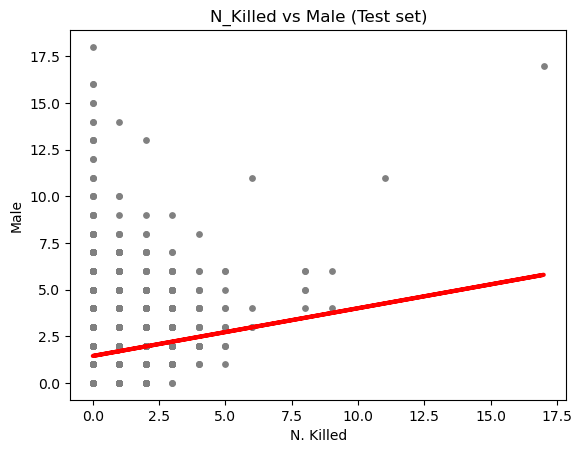

In [75]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('N_Killed vs Male (Test set)')
plot_test.xlabel('N. Killed')
plot_test.ylabel('Male')
plot_test.show()

In [79]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [80]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.25571226]]
Mean squared error:  0.9403050816782095
R2 score:  0.015075407268152818


In [81]:
y_predicted

array([[1.70073505],
       [1.44502279],
       [1.44502279],
       ...,
       [1.44502279],
       [1.70073505],
       [1.70073505]])

In [82]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.0,1.700735
1,4.0,1.445023
2,2.0,1.445023
3,2.0,1.445023
4,1.0,1.445023
5,2.0,1.445023
6,2.0,1.445023
7,1.0,1.445023
8,2.0,1.445023
9,1.0,1.445023


##### Compare how the regression fits the training set

In [83]:
# Predict.
y_predicted_train = regression.predict(X_train) 

In [84]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [85]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.25571226]]
Mean squared error:  1.005054451611825
R2 score:  0.020420940063072157


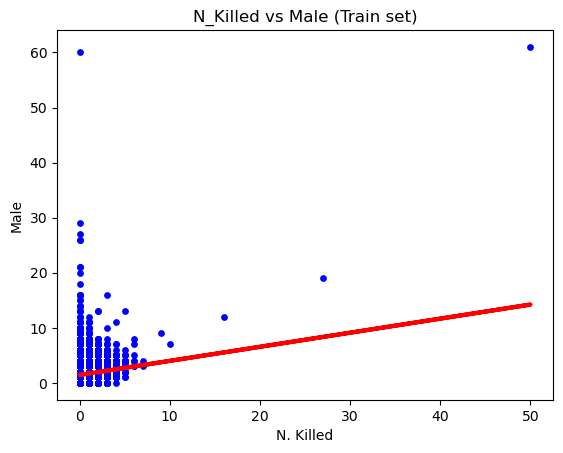

In [86]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('N_Killed vs Male (Train set)')
plot_test.xlabel('N. Killed')
plot_test.ylabel('Male')
plot_test.show()

## Exporting final data set, and saving the notebook.

In [93]:
df2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gun_violence_script4.csv'))